<a href="https://colab.research.google.com/github/mmousavi2/PUS2024_MMousavi/blob/main/HW2/citibikes_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Federica B. Bianco @fedhere
# for UDel PUS
# This is my example of Assignment 2.
# Assignment 2 you should design your own investigation into the citibike data.
- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data.
At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis (in words and a math formula)
- # Wrangle the data so that it is ready for your analysis.
- # Explore the data statistical properties (mean, standard deviation...)
- # Answer your question with a Z test
- # Answer your question with a xhi square test of proportions

In [34]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# IDEA:
## People that self-identify as women (_wome_ for short) are less likely than those who self-identified as men (_men_ for short) to choose biking _for commuting_ (intra week) than men

# Data: citibikes collected information for each customer's trip including date, duration, start and destination. Customers are identified by user type: Subscriber and Commuter, gender (encoded as binary W/M), age (birth year). Tus the data supports the investigation of my "theory" (the idea) based on the folliwing Null Hypothesis

# BUT: there is a different usage rate based on gender to begin with! so I cannot just test if more _men_ bike in the weekend than _women_ (because _men_ bike more on both weekend and week). I need to use fraction, or "proportions"

# NULL HYPOTHESIS:
## The proportion of _women_ biking on weekends is _less_ than the proportion of _men_ biking during the week

## The proportion of _men_ biking on weekends is _the same_ or _higher_  than the proportion of _women_ biking on weekends

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}} <= \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}}$
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}} > \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}}$

or identically:

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}} <= 0 $
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}} > 0$
## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

# THIS IS NHRT REQUIRES A TEST FOR DIFFERENCE OF PROPORTIONS:
Z test for unpaired data

https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/09:_Hypothesis_Tests_and_Confidence_Intervals_for_Two_Populations/9.03:_Two_Proportion_Z-Test_and_Confidence_Interval

## I am starting with a single month of data:  reading data from citibike csv file from May 2024

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

In [35]:

import pandas as pd
import zipfile
import requests
from io import BytesIO

In [36]:

datestring = '2019'

# Define the URL of the zip file
url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"

# Download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))



In [37]:
zip_file.extractall() #extract all the files in the zipped folder locally

I am going to look in the now local files (extracted with the command above) to find what I want

In [38]:
!ls

2019-citibike-tripdata	__MACOSX  sample_data


In [39]:
!ls 2019-citibike-tripdata

10_October   12_December  2_February  4_April  6_June  8_August
11_November  1_January	  3_March     5_May    7_July  9_September


In [40]:
!ls 2019-citibike-tripdata/5_May

201905-citibike-tripdata_1.csv	201905-citibike-tripdata_2.csv


In [41]:
# Read the CSV file from the zip file
cbMay19 = pd.read_csv(datestring + '-citibike-tripdata/5_May/' + datestring + '05-citibike-tripdata_1.csv')

In [42]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [43]:
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1688,2019-05-18 10:43:11.5260,2019-05-18 11:11:20.5010,525,W 34 St & 11 Ave,40.755942,-74.002116,3178,Riverside Dr & W 78 St,40.784145,-73.983625,25733,Customer,1969,0
999996,804,2019-05-18 10:43:12.1750,2019-05-18 10:56:37.0660,3576,Park Pl & Vanderbilt Ave,40.676700,-73.969024,157,Henry St & Atlantic Ave,40.690893,-73.996123,29920,Subscriber,1981,1
999997,150,2019-05-18 10:43:12.6190,2019-05-18 10:45:42.7890,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,262,Washington Park,40.691782,-73.973730,18835,Subscriber,1971,1
999998,345,2019-05-18 10:43:13.2630,2019-05-18 10:48:58.7550,296,Division St & Bowery,40.714131,-73.997047,502,Henry St & Grand St,40.714215,-73.981346,34018,Subscriber,1983,1


In [32]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

The proportation of trip duration among subscriber is significantly higher than the trip duration of customer for month of May 2019.

H0  :  tripduration<=subscriber
H1  :  subscriber>customer


# _$H_1$_


# _$H_1$_ : $\frac{S_{\mathrm{tripduration}}}{S_{\mathrm{total}}} > \frac{C_{\ {tripduration}}}{C_{\mathrm{total}}}$

# _$H_0$_ : $\frac{S_{\mathrm{tripduration}}}{S_{\mathrm{total}}} <= \frac{C_{\ {tripduration}}}{C_{\mathrm{total}}}$

We will use a significance level  α=0.05
which means we want the probability of getting a result at least as significant as mine to be less then 5%

In [44]:
#clean up
cbMay19.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [45]:
cbMay19.head()

,tripduration,usertype
0,139,Subscriber
1,754,Customer
2,2308,Subscriber
3,143,Subscriber
4,138,Subscriber


In [60]:
cbMay19['usertype'].type()

AttributeError: 'Series' object has no attribute 'type'

### Lets separate males (_m) from females (_w) to test the hypotheses.
### In this csv file gender == 1 is male, gender == 2 is female (0 is missing value)

### Lets plot the number of trips per week day

IndexError: index 0 is out of bounds for axis 0 with size 0

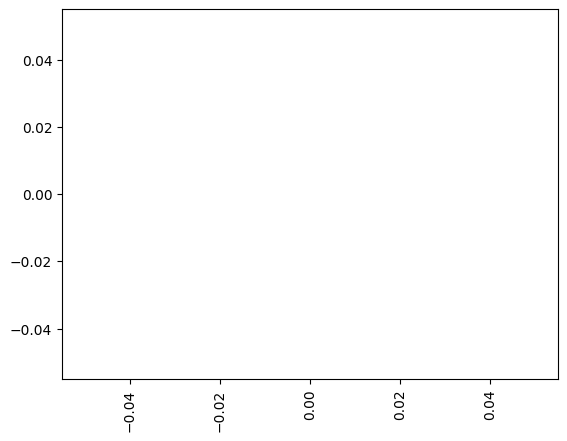

In [55]:
#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas

cbMay19_S = cbMay19[cbMay19['usertype'] == 1].drop(["usertype"], axis=1)
counts_S = cbMay19_S['tripduration']

ax = counts_S.plot(kind="bar", color='IndianRed',label='Subscriber')

cbMay19_C = cbMay19[cbMay19['usertype'] == 2].drop(["usertype"], axis=1)
counts_C = cbMay19_C['tripduration']

ax = counts_C.plot(kind="bar",
                                                                        color='SteelBlue',
                                                                        alpha=0.5,
                                                                        label='Customer', ax=ax)


plt.legend();
plt.title("trip duration by user type, May/2019");
plt.ylabel("trip duration");


ax1 = counts_S.plot(kind="bar", color='IndianRed', label='Subscriber')
ax2 = counts_C.plot(kind="bar", color='SteelBlue', alpha=0.5, label='Customer')

## Figure 1a: Distribution of Citibike bikers by gender in May 2019, absolute counts

In [ ]:

norm_w = len(cbMay19_w)
error_w = cbMay19_w["date"][cbMay19_w.date.dt.weekday < 5].groupby(cbMay19_w.date.dt.date).count().std()
eweekend_w = cbMay19_w["date"][cbMay19_w.date.dt.weekday >= 5].groupby(cbMay19_w.date.dt.date).count().std()
norm_w, error_w, eweekend_w

(236060, 3986.568378429929, 7469.5742716703735)

In [ ]:

norm_m = len(cbMay19_m)
error_m = cbMay19_m["date"][cbMay19_m.date.dt.weekday < 5].groupby(cbMay19_m.date.dt.date).count().std()
eweekend_m = cbMay19_m["date"][cbMay19_m.date.dt.weekday >= 5].groupby(cbMay19_m.date.dt.date).count().std()
norm_m, error_m, eweekend_m

(695072, 10200.225974746707, 15997.016118639125)

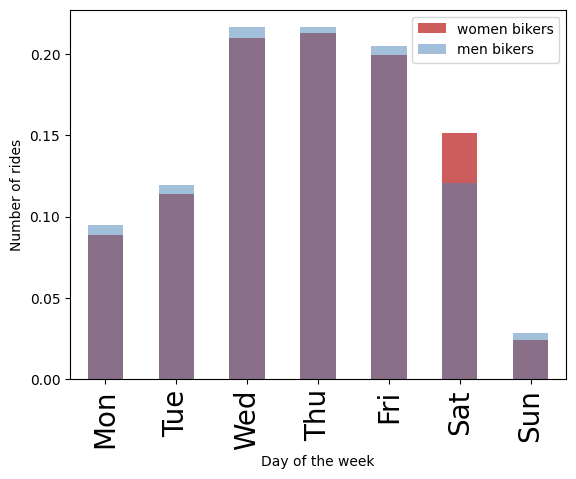

In [ ]:
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed', label='women bikers')
(counts_m / norm_m).plot(kind="bar", alpha=0.5,
                           color='SteelBlue', label='men bikers', ax=ax)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
plt.legend();


## Figure 2: Distribution of Citibike bikers by gender in May 2019, normalized

we can add up the weekend days and normalize by the totals, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))

## Set up the test of proportions
### I need the fraction of women that bikes during the weekdays and the fraction that bikes during weekends, and the same for men

Men: week:0.851, weekend:0.149, weekend error:0.015, weekend error:0.023
Women: week:0.824, weekend:0.176, weekend error:0.017, weekend error:0.032


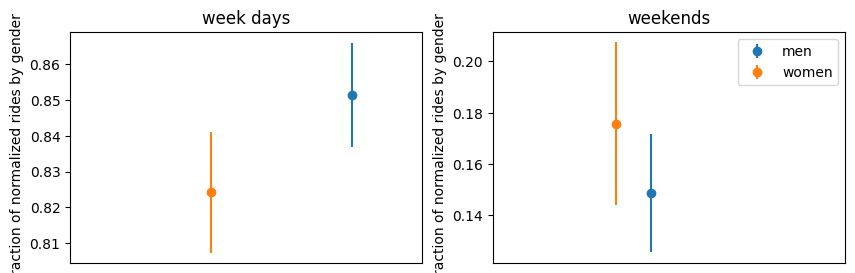

In [ ]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

week_w = sum(counts_w[:-2]) * 1.0 / norm_w  #fraction of women riding on week days
weekend_w = sum(counts_w[-2:]) * 1.0 / norm_w  #fraction of women riding on weekends
eweek_w = error_w / norm_w  #error on fraction number of women riding on week days
eweekend_w = eweekend_w / norm_w #error on fraction number of women riding on weekends

#same nomenclature as above
week_m = sum(counts_m[:-2]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m= error_m / norm_m  #error on fraction number of men riding on week days
eweekend_m = eweekend_m / norm_m #error on fraction number of men riding on weekends

print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))

ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='men')
ax1.errorbar([0.2], [week_w], yerr=[eweek_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='men')
ax2.errorbar([0.2], [weekend_w], yerr=[eweekend_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")
ax1.set_xticks([])
ax2.set_xticks([])
plt.xlim(-0.5, 1.5)
plt.legend();

## Figure 3: Fraction of Citibike bikers per gender in May 2019 for week days (left) and weekends (right)

### Is the percentage of women that ride on weekends lower or equal to that of man?
## The statistics is:
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation
# $p_0 = \frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}}$
### and
# $p_1 = \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}}$


In [ ]:
P0mP1 = weekend_w - weekend_m
print ("difference between man and women on weekend: {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend: 0.03
We must check the significance before we reject the Null Hypothesis


### Is this difference statistically significant?

In [ ]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

def ztest_p(p0, p1, n0, n1):
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) :
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations

z = zscore(weekend_w, weekend_m, norm_w, norm_m)
print ("The z statistics is %.2f"%z)

The z statistics is 31.44


## The largest number reported in  z stats tables is (thpically) 3, which gives  a p value
## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)

# We reject the Null Hypothesis that man are more likely to commute than women $p< 0.05$


# Let's check the _effect size_:
# there are 2 formulae I find in the literature
# $r = \frac{z}{\sqrt{(n_0+n_1)}}$
# and
# $h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$. https://en.wikipedia.org/wiki/Cohen%27s_h

In [ ]:
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n0)
def h_effectsize (p0, p1):
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [ ]:
r = r_effectsize(z, norm_w, norm_m)
print ('r effect size {:.2f}'.format(r))

r effect size 0.06


In [ ]:
h = h_effectsize(weekend_w, weekend_m)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size 0.09


# In all these cases we have SMALL EFFECT SIZE